## The Sparks Foundation GRIP December 2022 Data Science & Business Analytics

#GRIPDECEMBER22

Name : Sakshi Lathi

task 1: Predict the percentage of a student based on the number of study hours.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
#Downloading the data from given url and creating a .csv file
#Importing data
dataset = pd.read_csv("Students_score.csv")

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Cleaning

In [4]:
#Checking for null values in dataset
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#Checking for duplicate values in dataset
dataset.duplicated().sum()

0

### EDA (Exploratory Data Analysis)

In [6]:
#Data size
dataset.shape
#Datafreame consist 2 coloumns and 25 rows.

(25, 2)

In [7]:
#Collecting Information of whole Dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Describing the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

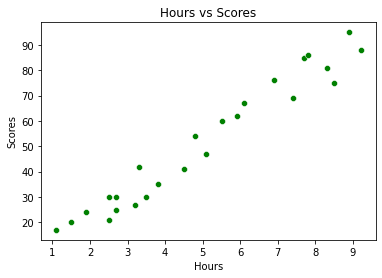

In [9]:
#Plotting a Scatter Plot to understand relationship between hours of study and scores
sns.scatterplot(x='Hours', y='Scores', data= dataset,color='g')
plt.title("Hours vs Scores")
plt.show()

Graph shows that it is a Positive Linear Relation that exists between Hours and Scores 

In [10]:
#Correlation is used to find the extent to which variables are linearly related 
df=dataset.corr(method='pearson')

In [11]:
df

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


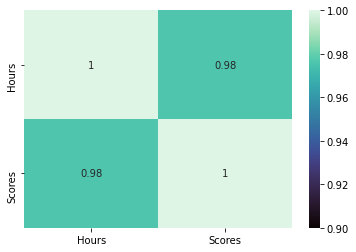

In [12]:
sns.heatmap(df,cmap="mako", annot=True, vmin=0.9,vmax=1)
plt.show()
#help(sns.heatmap)

# ML

In [13]:
#Data Prepration

#Splitting the data into Independent and Dependent Variables.
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print("Independent variable Values (Hours):\n", X)
print("\nDependent variable Values (Scores):\n", y)

Independent variable Values (Hours):
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

Dependent variable Values (Scores):
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [14]:
#Splitting the Dataset for Training and Testing Purpose
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80)
print("Training set contains ",len(X_train))
print("Testing set contains ",len(X_test))

Training set contains  20
Testing set contains  5


### Training the Algorithm 

Linear regression model is used for traing the data as the relationship is linearly positive.

In [15]:
lr_model = LinearRegression()
model = lr_model.fit(X_train, y_train)

In [16]:
#Slope
model.coef_

array([9.74518663])

In [17]:
#y intercept (c)
model.intercept_

2.414525607781414

In [18]:
#Regression Line
line= model.coef_*X+model.intercept_

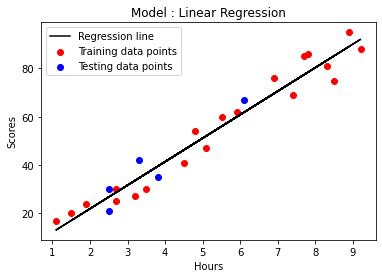

In [19]:
# Plotting for the test data
plt.scatter(X_train, y_train,c="red",label="Training data points")
plt.scatter(X_test,y_test,c="b",label="Testing data points")
plt.plot(X, line,c="black",label="Regression line")
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Model : Linear Regression")
plt.show()

In [20]:
#Making Predictions using the model for X_test
Y_predict_test = model.predict(X_test)

In [21]:
#Actual values and Predicted values 
data=pd.DataFrame({'Actual':y_test,'Predicted':Y_predict_test})

In [22]:
data

,Actual,Predicted
0,21,26.777492
1,42,34.573641
2,30,26.777492
3,67,61.860164
4,35,39.446235


In [23]:
# Accuracy score of training and testing data set
print("Training Accuracy Score:",round(model.score(X_train,y_train)*100,2),"%")
print("Testing Accuracy score:",round(model.score(X_test,y_test)*100,2),"%")

Training Accuracy Score: 95.6 %
Testing Accuracy score: 88.05 %


## Evaluation of Model

This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [24]:
r2score=r2_score(y_test,Y_predict_test)
mean_abs_error=mean_absolute_error(y_test,Y_predict_test)
root_mean_squ_error= mean_squared_error(y_test,Y_predict_test,squared=False)

print("Root Mean Squared Error:",root_mean_squ_error) 

print("R2 score:",r2score)

print("Mean Absolute Error",mean_abs_error)

Root Mean Squared Error: 5.3870528298416795
R2 score: 0.8804763665918235
Mean Absolute Error 5.202485855234604


Root Mean Squared error is how far predictions fall from measured true values using Euclidean distance, it is 5.38             
R2 score i.e. Coefficient of Determination is 88%                                                                            
Mean Absolute error is the average of all errors, the value is only 5.202

## Prediction of results using the model

In [26]:
hours = [[9.25]]
own_predicted_score = model.predict(hours)

print("Predicted Score  of the student who studied for {} hrs is {}".format(hours[0][0],round(own_predicted_score[0],3)))

Predicted Score  of the student who studied for 9.25 hrs is 92.558
